In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yahooFinance

In [2]:
spy_df = yahooFinance.Ticker("SPY").history(period="1y")
spy_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2023-09-07 00:00:00-04:00,436.997544,439.403888,436.642524,438.713562,70355400,0.0,0.0,0.0
2023-09-08 00:00:00-04:00,438.762825,440.942331,438.397934,439.374268,61659700,0.0,0.0,0.0
2023-09-11 00:00:00-04:00,442.056730,442.579418,440.311157,442.263855,60180100,0.0,0.0,0.0
2023-09-12 00:00:00-04:00,440.784578,442.342770,439.246100,439.837799,67565400,0.0,0.0,0.0
2023-09-13 00:00:00-04:00,440.064639,441.534076,438.940350,440.350647,60199300,0.0,0.0,0.0


In [3]:
class StockTicker:

    def __init__(self, df):
        self.df = df
        self.index = 0
        self.date = df.index[self.index]

    def next_day(self):
        self.index += 1
        self.date = self.df.index[self.index]

    def get_price(self):
        return self.df.loc[self.date].Close

    def get_date(self):
        return self.date

    def get_prev_price(self):
        return self.df.loc[self.index - 1].Close

    def get_next_price(self):
        return self.df.loc[self.index + 1].Close

spy_ticker = StockTicker(spy_df)

In [4]:
# have a class to hold information about holding, cash, and portfolio value
class Trader:

    def __init__(self, cash, stock_ticker):
        self.cash = cash
        self.holdings = 0 # number of shares of SPY
        self.stock_ticker = stock_ticker

    def __str__(self):
        return f"Cash: {self.cash}, SPY Holding: {self.holdings}"

    def portfolio_value(self):
        return self.cash + self.stock_ticker.get_price() * self.holdings

    def buy(self, amount):
        if self.cash < amount:
            amount = self.cash
        price = self.stock_ticker.get_price()
        self.holdings += amount / price
        self.cash -= amount


In [5]:
trader = Trader(10000, spy_ticker)
print(trader.portfolio_value())

10000.0


In [6]:
START_CASH = 10000
TRADING_DAYS = 100
AMOUNT_BOUGHT_PER_DAY = 50
# trader buys $10 every day for 100 days
trader = Trader(START_CASH, spy_ticker)

portfolio_values = []

for i in range(TRADING_DAYS):
    portfolio_values.append(trader.portfolio_value())
    trader.buy(AMOUNT_BOUGHT_PER_DAY)
    print(trader)
    spy_ticker.next_day()


Cash: 9950, SPY Holding: 0.1139695790819077
Cash: 9900, SPY Holding: 0.22776777731414605
Cash: 9850, SPY Holding: 0.3408224604788105
Cash: 9800, SPY Holding: 0.4545007302988742
Cash: 9750, SPY Holding: 0.5680466063949863
Cash: 9700, SPY Holding: 0.6806218151407828
Cash: 9650, SPY Holding: 0.7945699057487102
Cash: 9600, SPY Holding: 0.9084512127063062
Cash: 9550, SPY Holding: 1.0225691809021913
Cash: 9500, SPY Holding: 1.137746005165584
Cash: 9450, SPY Holding: 1.254858512801414
Cash: 9400, SPY Holding: 1.3722349376490517
Cash: 9350, SPY Holding: 1.4891198408337658
Cash: 9300, SPY Holding: 1.6077475390545748
Cash: 9250, SPY Holding: 1.7263279039584345
Cash: 9200, SPY Holding: 1.8442247689552986
Cash: 9150, SPY Holding: 1.9624084593319189
Cash: 9100, SPY Holding: 2.0806391753457656
Cash: 9050, SPY Holding: 2.200473995801622
Cash: 9000, SPY Holding: 2.3194425016780156
Cash: 8950, SPY Holding: 2.4384558502192557
Cash: 8900, SPY Holding: 2.55607274978064
Cash: 8850, SPY Holding: 2.672941436

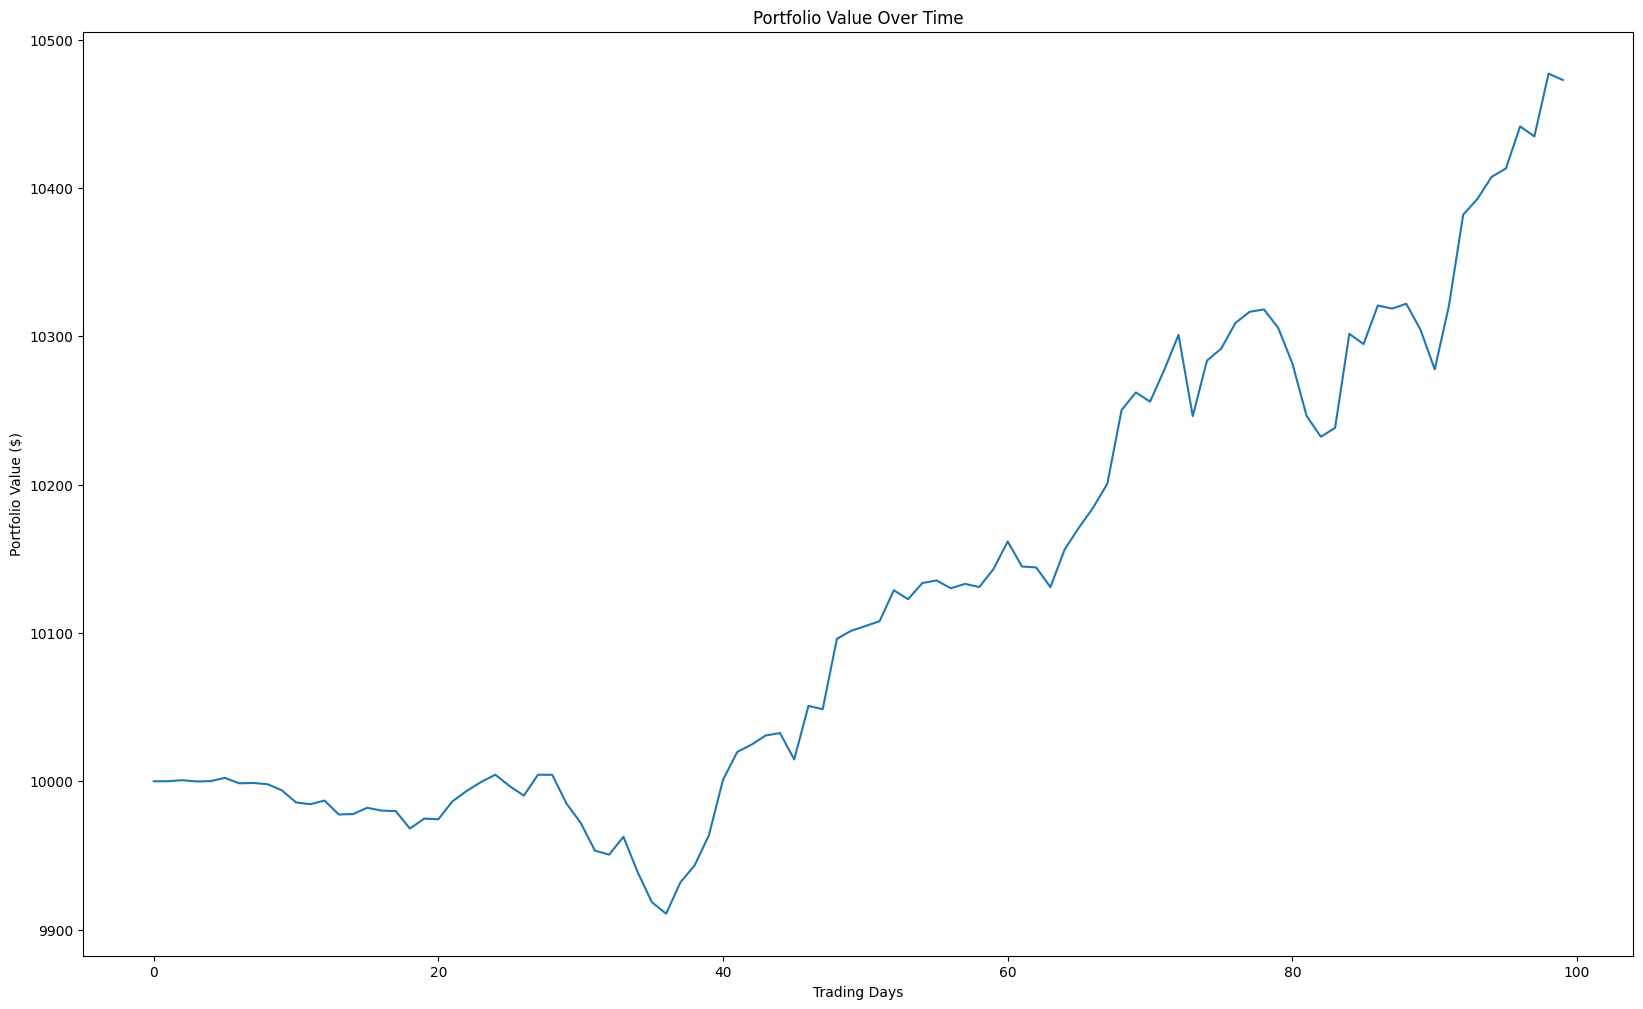

In [7]:
plt.figure(figsize=(20, 12))
plt.plot(portfolio_values)
plt.title("Portfolio Value Over Time")
plt.xlabel("Trading Days")
plt.ylabel("Portfolio Value ($)")
plt.show()